# Langkah 1: Import Library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Langkah 2: Dataset Dummy Harga Mobil

In [ ]:
data = {
    "year": [2015,2012,2018,2020,2017,2014,2016,2013,2019,2021,
             2011,2010,2015,2018,2016,2012,2019,2020,2014,2013],
    "mileage": [50000,80000,30000,20000,40000,90000,60000,75000,25000,15000,
                120000,110000,55000,35000,45000,95000,28000,18000,85000,70000],
    "engine_size": [1.6,2.0,1.8,2.2,2.0,1.5,1.6,1.8,2.4,2.5,
                    1.4,1.3,1.8,2.0,1.6,1.5,2.2,2.3,1.5,1.7],
    "horsepower": [110,150,130,180,160,100,120,140,200,210,
                   90,85,125,150,115,105,175,185,95,118],
    "weight": [1200,1500,1300,1600,1400,1100,1250,1350,1700,1750,
               1000,980,1280,1450,1220,1080,1650,1680,1120,1260],
    "price": [15000,10000,20000,25000,18000,9000,16000,13000,27000,30000,
              7000,6500,15500,21000,16500,9500,24000,26000,8800,14000]
}

df = pd.DataFrame(data)
print(df.head())


   year  mileage  engine_size  horsepower  weight  price
0  2015    50000          1.6         110    1200  15000
1  2012    80000          2.0         150    1500  10000
2  2018    30000          1.8         130    1300  20000
3  2020    20000          2.2         180    1600  25000
4  2017    40000          2.0         160    1400  18000


# Langkah 3: Pisahkan Fitur dan Target

In [ ]:
X = df.drop("price", axis=1)
y = df["price"]

# Langkah 4: Split Data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# Langkah 5: Normalisasi Data

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Langkah 6: Linear Regression

In [ ]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred_lin = linreg.predict(X_test)


# Langkah 7: Decision Tree Regressor

In [ ]:
tree = DecisionTreeRegressor(random_state=42)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)


# Langkah 8: Random Forest Regressor

In [ ]:
forest = RandomForestRegressor(n_estimators=100, random_state=42)
forest.fit(X_train, y_train)
y_pred_forest = forest.predict(X_test)


# Langkah 9: Support Vector Regressor (SVR)

In [ ]:
svr = SVR(kernel='linear')
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)


# Langkah 10: Evaluasi Model

In [ ]:
models = {
    "Linear Regression": y_pred_lin,
    "Decision Tree": y_pred_tree,
    "Random Forest": y_pred_forest,
    "SVR": y_pred_svr
}

results = {}
for name, y_pred in models.items():
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = [mse, rmse, mae, r2]

results_df = pd.DataFrame(results, index=["MSE","RMSE","MAE","R²"]).T
print(results_df)


                            MSE         RMSE          MAE        R²
Linear Regression  6.763398e+06  2600.653456  1527.459880  0.846450
Decision Tree      3.125000e+06  1767.766953  1500.000000  0.929053
Random Forest      5.193027e+06  2278.821351  1541.750000  0.882102
SVR                4.467763e+07  6684.132875  5962.499118 -0.014320


# Langkah 11: Visualisasi Perbandingan

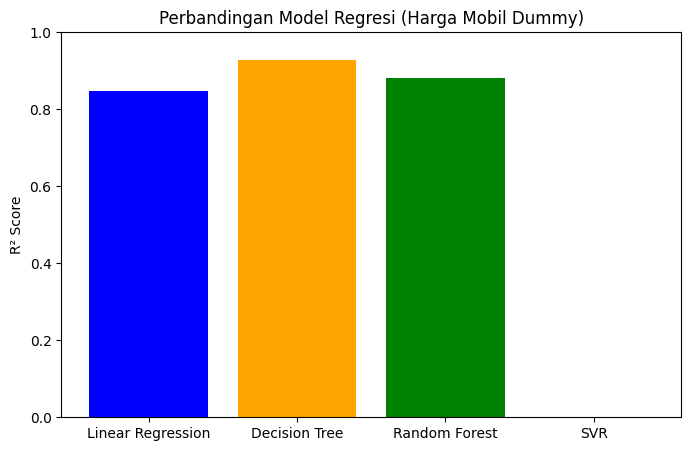

In [ ]:
plt.figure(figsize=(8,5))
plt.bar(results_df.index, results_df["R²"], color=['blue','orange','green','red'])
plt.ylabel("R² Score")
plt.title("Perbandingan Model Regresi (Harga Mobil Dummy)")
plt.ylim(0,1)
plt.show()
